# Lab Work: Developing and Comparing AI Models for Android Malware Detection

## Objective:
The goal of this lab is to develop and evaluate multiple AI models for detecting Android malware using the provided Android Malware Dataset. Students will choose at least three different machine learning or deep learning algorithms to compare their performance in classifying Android applications as benign or malicious.

## Dataset Overview:
The **Android Malware Dataset for Machine Learning** contains labeled Android APK samples, classified as benign (goodware) or malicious (e.g., adware, spyware, trojans). It includes various features extracted from the APKs, such as requested permissions, API calls, system behaviors, and more, which can be used to train machine learning models.

## Tasks:

1. **Data Preprocessing**:
   - Load the dataset and clean it by handling missing values and converting categorical features into numerical ones if necessary.
   - Split the data into training and testing sets.

2. **Model Development**:
   - Choose at least **three AI algorithms** of your choice (e.g., Logistic Regression, Random Forest, SVM, Neural Networks, XGBoost, etc.).
   - Train each model on the dataset and evaluate their performance using accuracy, precision, recall, F1-score, and confusion matrix.

3. **Model Comparison**:
   - Compare the models based on their performance metrics.
   - Analyze which model performs best and why.

4. **Optional (Hyperparameter Tuning)**:
   - Optionally, apply techniques like grid search to optimize the model’s hyperparameters.


## Resources:
- Kaggle Dataset: [Android Malware Dataset for Machine Learning](https://www.kaggle.com/datasets/shashwatwork/android-malware-dataset-for-machine-learning)

You need to login in Kaggle to get access to the dataset.


**Lab Logbook requirement**: Provide a graph comparing the performance of the AI model that you have developed.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix
)

df = pd.read_csv('drebin-215-dataset-5560malware-9476-benign.xls',low_memory=False, na_values=['?']).fillna(0)

df['label'] = df['class'].map({'B': 0, 'S': 1})
X = df.drop(columns=['class', 'label']).apply(pd.to_numeric, errors='coerce').fillna(0)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [2]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, solver='liblinear'),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42)
}


In [3]:
results = []
all_preds = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    all_preds[name] = y_pred
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results)

In [4]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(models))
width = 0.2

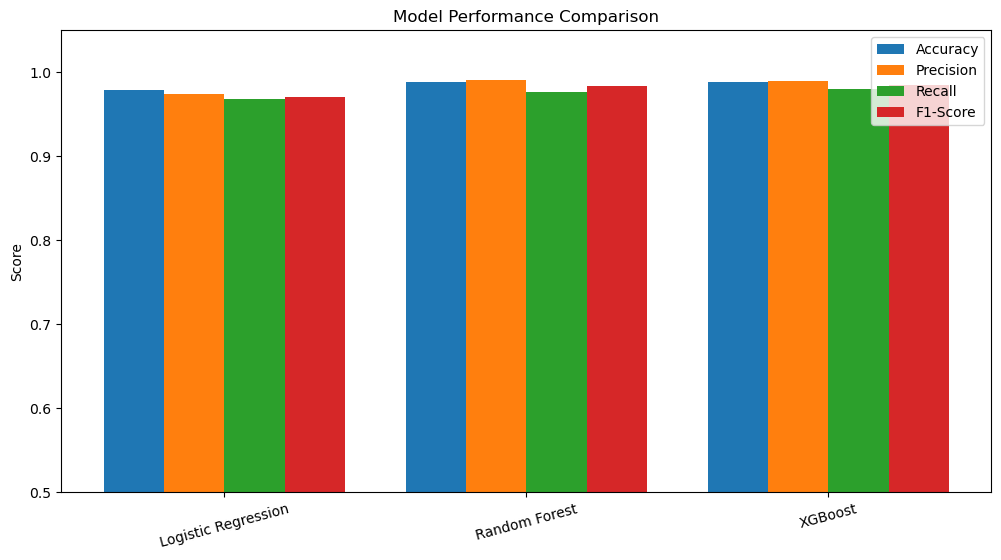

In [7]:
plt.figure(figsize=(12, 6))
for i, metric in enumerate(metrics):
    plt.bar(x + i*width - width*1.5, results_df[metric], width, label=metric)

plt.xticks(x, results_df['Model'], rotation=15)
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.ylim(0.5, 1.05)
plt.legend()
plt.show()

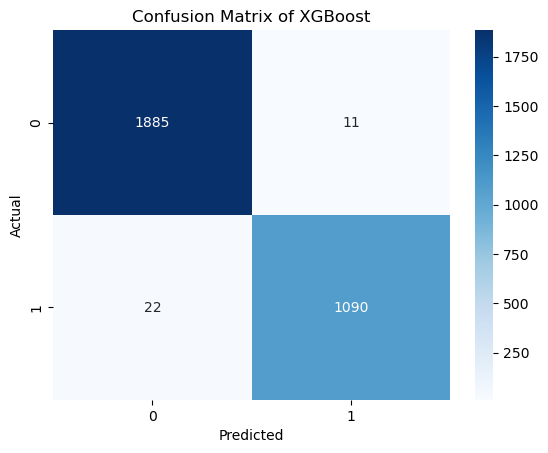

In [14]:
import seaborn as sns

best_model_name = results_df.sort_values('F1-Score', ascending=False).iloc[0]['Model']
cm = confusion_matrix(y_test, all_preds[best_model_name])
plt.title(f'Confusion Matrix of {best_model_name}')
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()